# Website Traffic Analysis

## Table Of Contents

* [Business Problem Statement](#business-problem-statement)
* [Data Description](#data-description)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Question 1](#question-1)
* [Question 2](#question-2)
* [Question 3](#question-3)
* [Question 4](#question-4)
* [Question 5](#question-5)
* [Question 6](#question-6)

<a name="business-problem-statement"></a>
# Business Problem Statement:

The given dataset  encompasses web traffic information  from multiple pages spanning a duration of 7 days. It includes diverse categorical attributes regarding the geographical source of the traffic and the content of each page denoted by the isrc identifier. The primary objective is to gain deeper insights into this web traffic, specifically focusing on the quantity and distribution of events. Additionally, the aim is to formulate strategies for enhancing the click rates of the links. To achieve this, a comprehensive analysis of the dataset is requested, utilizing Python libraries such as Pandas and SciPy as needed, and providing responses to the presented analytical questions.

![Image](https://easyinsights.ai/easyinsights_wordpress/wp-content/uploads/2022/01/How-to-define-Quality-User-to-Optimize-E-Commerce-Campaigns-and-Boost-Sales-3-1.jpg)


<a name="data-description"></a>
# Data Description:

The provided dataset, named traffic.csv, encompasses web traffic data denoted as "events" originating from diverse pages referred to as "links." This dataset spans a period of 7 days and incorporates various categorical dimensions related to the geographic origin of the traffic. The dataset also provides insights into a page's content, identified by the isrc identifier.

The primary focus of this analysis is on conducting a comprehensive examination of website traffic patterns, aiming to derive meaningful insights. The dataset will be scrutinized using analytical approaches, and potential patterns or trends in the web traffic data will be explored. This analysis involves a combination of solution discussions, coding, and responses to both coding and non-coding questions.

For the analysis, Python libraries such as Pandas and Scipy will be employed. These libraries offer robust functionalities for data manipulation, statistical calculations, and numerical operations, contributing to a thorough exploration of the web traffic dataset.

<a name="exploratory-data-analysis"></a>
# Exploratory Data Analysis:

We'll initiate the process by importing the essential libraries. Pandas will be utilized for creating and analyzing the dataset, while Scipy will play a role in computing certain statistical measures. Additionally, we may leverage the Numpy library for specific mathematical operations, given its widespread use in Python for numerical computations.

In [4]:
# Import libraries: pandas and scipy are required, numpy will come in handy
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
# Modify this to point to the downloaded CSV file
CSV_FILE_PATH = "traffic.csv"

# Load the dataset
traffic_df = pd.read_csv(CSV_FILE_PATH)

The shape and 'head' of a DataFrame are fundamental methods often employed when working with the Pandas library. The shape method outputs the number of columns and rows in the data as a tuple. On the other hand, the 'head' method displays the first n (5 by default) rows of the dataset. These methods are useful for obtaining an initial sense of the dataset's structure and content.








In [6]:
traffic_df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


<a name="question-1"></a>
# Question 1


**How many total pageview events did the links in the provided dataset receive over the entire period, and how many per day ?**

To display each unique value of the event column, along with a count of its occurrences, we can leverage the value_counts() method. The output for the pageview events is 142,015, signifying the total number of such events. Alternatively, another approach is to filter the dataset to include only the pageview events and then determine the number of rows in the filtered dataset (as shown in the second cell below).


To determine the number of pageview events per day, we need to employ the groupby method, followed by an aggregation using the count function. We group the pageview events by date and subsequently count their occurrences.

In [7]:

# 1. Filter only for 'pageview' events
# 2. Group by the date
# 3. Keep only the 'event' column and specify a 'count' aggregation
pageview_counts_per_date = traffic_df[traffic_df["event"] == "pageview"].groupby(by="date")["event"].count()

It's important to acknowledge that duplicates are permitted in the data. In other words, if the same user views the same page multiple times, each instance will be counted. To alter this behavior, we can utilize df.drop_duplicates(). The subsequent cells showcase the impact of deduplication, revealing a notable reduction in the number of events by nearly half.

In [8]:
# Drop duplicates from the dataset
deduplicated_df = traffic_df.drop_duplicates()

# Count occurrences of each event
event_counts = deduplicated_df["event"].value_counts()

In [9]:
# Get the total number of 'pageview' events
total_pageviews = deduplicated_df[deduplicated_df["event"] == "pageview"].shape[0]

<a name="question-2"></a>
# Question 2

**How other recorded events should be handled ?**

In the initial line of the cell below, we acquire the set of all unique events present in the data. Subsequently, we eliminate the pageview event from consideration, given that it has already been analyzed in the previous question. Our focus will then shift to addressing the remaining events.

In [10]:
# Get the set of recorded events in the data
recorded_events = set(traffic_df["event"].unique())
# Remove the 'pageview' event
recorded_events.remove("pageview")

After obtaining the other recorded events, we can iterate over them and apply the same solution as in Question 1, incorporating informative print statements during the process.

In [11]:
# Loop over each event
for recorded_event in recorded_events:
    # Get the total number of occurrences
    total_events = traffic_df[traffic_df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    # Group by the date and aggregate by count
    data_set = traffic_df[traffic_df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "event distribution per day:\n")
    print(data_set, "\n")

Total number of preview events is 28531 

preview event distribution per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 

Total number of click events is 55732 

click event distribution per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 



<a name="question-3"></a>

# Question 3

**Which countries generated the clicks?**


This question is relatively straightforward compared to the previous ones, as it doesn't involve any groupings or aggregations. The solution comprises two steps:

1. Filter for click events only.
2. Print the unique values of the Country column, excluding any NaN values.

In [18]:
# filter for the proper event
df_q3 = traffic_df[traffic_df["event"] == "click"]
# or alternatively, you can loop over the array provided by df.unique() and print them all
pd.DataFrame(data=df_q3["country"].dropna().unique(), columns=["Country"])

,Country
0,Saudi Arabia
1,India
2,France
3,Maldives
4,United States
...,...
197,Guernsey
198,Palau
199,Åland
200,Principality of Monaco


<a name="question-4"></a>
# Question 4

**What is the overall click rate, calculated as the ratio of clicks to pageviews?**

The click rate is computed as the number of clicks a page has received (event = 'click') divided by the number of times it has been shown (event = 'pageview'). This metric is widely used to gauge the success of an advertising campaign.

The calculation involves several steps. Initially, we count the occurrences of each link being clicked on and the number of times each link has been viewed. The process is consistent for both calculations. We begin by filtering for the relevant event (click or pageview), followed by grouping the filtered data by the link Id and counting the occurrences of that event.

In [12]:
# Filter for the 'click' events and group them by 'linkid' to get their count
clicks_df = traffic_df[traffic_df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
clicks_df = clicks_df.rename(columns={
    "event": "clicks"  # Rename column for easier manipulation
})
# Do the same for the 'pageview' events
pageviews_df = traffic_df[traffic_df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews_df = pageviews_df.rename(columns={
    "event": "pageviews"
})


To obtain the answer, we must join these two DataFrames based on the same link Id and subsequently calculate the click rate by dividing the number of clicks by the number of pageviews. This can be accomplished using Pandas' merge() method. We specify a 'left' and a 'right' DataFrame, the column to merge on, and the type of merge ('inner' is specified, which takes the intersection of the two datasets).

In [13]:

# Merge the two dataframes using pd.merge()
merged_df = pd.merge(left=clicks_df, right=pageviews_df, on="linkid", how="inner")

# Define a new column for the 'click_rate'
merged_df["click_rate"] = merged_df["clicks"] / merged_df["pageviews"]

Following the merge, we can perform column-wise arithmetic operations to generate a new column that stores the click rate. The subsequent cell displays the finalized dataset, presenting the click rate associated with each link.








In [21]:
merged_df


,linkid,clicks,pageviews,click_rate,click_rate_log2
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000,0.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000,0.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667,-0.584963
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222,-2.169925
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000,-0.415037
...,...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238,-1.534336
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000,0.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000,0.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000,-1.000000


<a name="question-5"></a>
# Question 5

**In what manner is the distribution of click rates observed across various links?**

To comprehend the distribution of the click rate across diverse links, we can employ the describe() method. The following cell executes this operation. Observe the output, which includes the count (number of links), mean, standard deviation, minimum, maximum, and the click rate values at the 25th, 50th, and 75th percentiles.

Utilizing the plot() method, we generate a histogram with 100 bins. It's worth noting the inclusion of parameters for the figure size and the label of the X-axis. Incorporating these parameters is advisable as they significantly contribute to making the interpretation of the graphic more accessible and comprehensible

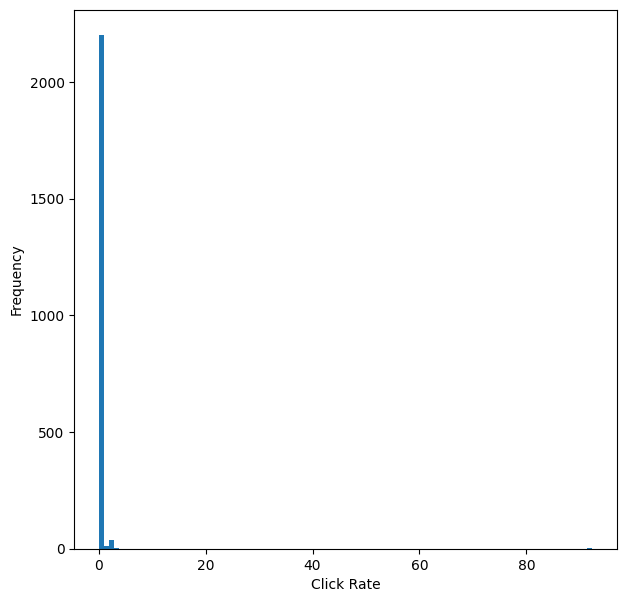

In [14]:
# Plot the histogram of click rates
ax = merged_df["click_rate"].plot(kind="hist", figsize=(7, 7), bins=100)
plot_show = ax.set_xlabel("Click Rate")

The histogram illustrates a leftward skewness in the data, indicating that a substantial number of values are in close proximity to zero. To address this skewness, a typical approach is to plot the histogram of the logarithm of the data. To implement this, we can utilize Numpy's log2() method, providing an alternative perspective that can better capture the distribution characteristics.

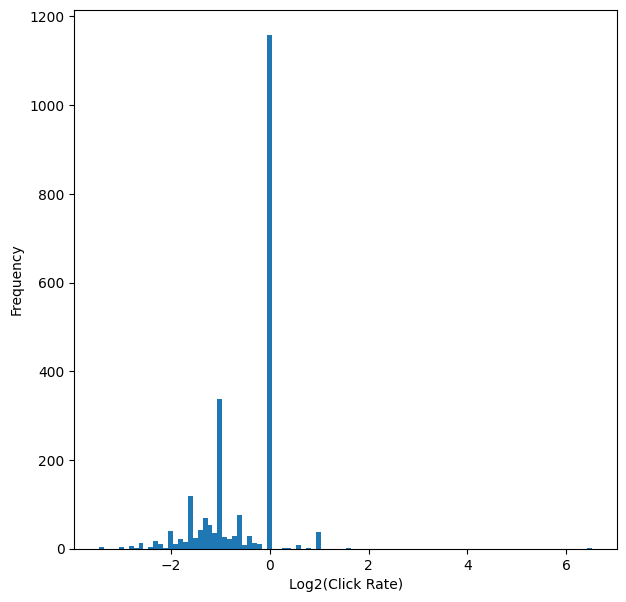

In [15]:
# Plot the histogram of log-transformed click rates
merged_df["click_rate_log2"] = np.log2(merged_df["click_rate"])
ax = merged_df["click_rate_log2"].plot(kind="hist", figsize=(7, 7), bins=100)
plot_show = ax.set_xlabel("Log2(Click Rate)")

In our plot overview, a significant spike is observed at 0, indicating that the actual click rate was 1. This suggests the presence of numerous links that have been both viewed and clicked on exactly once. Additionally, there is a noticeable concentration of links that have been viewed multiple times but with fewer clicks (values less than zero). It's crucial to note that this plot represents the logarithm of the actual values, introducing an additional mathematical step in the interpretation. Therefore, the interpretation involves considering the logarithmic transformation of the click rates.

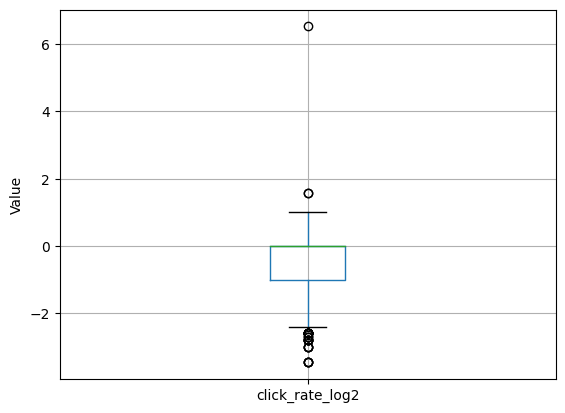

In [16]:

# Boxplot of log-transformed click rates
ax = merged_df.boxplot(column="click_rate_log2")
_ = ax.set_ylabel("Value")

<a name="question-6"></a>
# Question 6

**Is there a discernible correlation between the occurrences of clicks and previews associated with a given link? If a correlation exists, is it statistically significant, and what is the magnitude of the observed effect? Ensure to perform tests that investigate potential linear relationships as well as categorical relationships, particularly focusing on binary associations between both variables.**

The Pearson's correlation coefficient serves as an indicator of linear correlation between two datasets, with values falling within the range of [-1, 1]. A coefficient further away from zero implies a more significant correlation. The implementation of Pearson's coefficient is available in both Pandas and Scipy. In this analysis, we will employ both libraries to explore their APIs and ensure result consistency.

Initially, we'll filter the dataset to include only click and preview events. Describing this filtered dataset will provide an initial understanding of its contents

In [17]:

# Filter only events that are relevant to the question
relevant_events_df = traffic_df[traffic_df["event"].isin(["click", "preview"])]

# Descriptive statistics for the filtered dataset
stats_df = relevant_events_df.describe()


In [19]:
stats_df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,4,4,4,4,4,4,4,4,4
unique,4,4,4,4,4,4,4,4,4
top,84263,84263,84261,84261,84252,84262,84262,82036,84263
freq,1,1,1,1,1,1,1,1,1
